In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import textwrap

In [47]:
df=pd.read_excel("/content/drive/MyDrive/side_effect_data 1.xlsx")
df

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,9,NaN,1957-01-04,Turkiye,NaN,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,Ishal,2022-02-12 19:13:43,Ispanakgiller,NaN,,"Astim, Guatr",,"KOAH, Kan Hastaliklari",NaN,50.0,152.0
2353,101,Female,2004-11-09,Turkiye,Mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Istiridye,NaN,"Hipertansiyon, Astim","Astim, Kemik Erimesi","KOAH, Kan Hastaliklari","Astim, Diyabet",AB RH-,NaN,178.0
2354,127,Female,1951-11-29,Turkiye,Mersin,trazodone,2022-01-02,2022-03-12,Yorgunluk,2022-02-03 20:48:17,Deniz Urunler,"Guatr, KOAH","Alzheimer, Diger",NaN,"Astim, Diyabet","Kalp Hastaliklari, Diger",B RH+,90.0,203.0
2355,178,Male,1980-01-30,Turkiye,Kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,Carpinti,2022-02-04 05:29:20,Sari Kantaron,"Alzheimer, Diger",NaN,"Kalp Hastaliklari, Diger","Kanser, KOAH","Astim, KOAH",NaN,90.0,184.0


**Her bir hastanın yaşını hesaplama ve ayrı bir sütun olarak verisetine ekleme:**

In [30]:
from datetime import datetime
current_year = datetime.now().year
df['Yas'] = current_year - (pd.to_datetime(df['Dogum_Tarihi']).dt.year)

**"Kronik Hastaliklarim" sütunun içeriğinin "," ile ayrılmış değerler olmasından ötürü her bir kronik hastalık için ayrı bir satır olacak şekilde düzenleme:**

In [25]:
# "Kronik Hastaliklarim"
df['Kronik Hastaliklarim'] = df['Kronik Hastaliklarim'].str.split(',')
df_exploded = df.explode('Kronik Hastaliklarim')

# Benzersiz hastalıkl sayısını öğrenme;
unique_count = len(df_exploded['Kronik Hastaliklarim'].unique())
print(f"Benzersiz hastalık sayısı: {unique_count}")

Benzersiz hastalık sayısı: 22


**Hastalık gruplarında kaçar adet örneğimiz olduğu;**

In [26]:
DepGroup = df_exploded.groupby("Kronik Hastaliklarim")
print(DepGroup.size())

Kronik Hastaliklarim
 Alzheimer            138
 Astim                172
 Diger                248
 Diyabet              203
 Guatr                168
 Hipertansiyon        277
 KOAH                 130
 Kalp Hastaliklari    163
 Kan Hastaliklari     135
 Kanser                89
 Kemik Erimesi         56
Alzheimer             205
Astim                 124
Diyabet               193
Guatr                 137
Hipertansiyon         184
KOAH                  291
Kalp Hastaliklari     164
Kan Hastaliklari      248
Kanser                184
Kemik Erimesi         235
dtype: int64


**Verisetindeki Kronik Hastalıklarım sutununa veri girişi sırasında aynı hastalıklar yazılırken bazılarının sonuna boşluk eklenmesinden ötürü yukarıdaki çıktıda görüldüğü gibi sayımlarda hata oluşuyor. Bundan dolayı boşlukları temizleme;**

In [29]:
df_exploded['Kronik Hastaliklarim'] = df_exploded['Kronik Hastaliklarim'].str.strip()
df_exploded['Ilac_Adi'] = df_exploded['Ilac_Adi'].str.strip()

# Tekrar gruplama işlemi
DepGroup = df_exploded.groupby("Kronik Hastaliklarim")
print(DepGroup.size())  #her gruptaki eleman doğru sayısıni artık görebiliriz

# Her bir grubun "Yaş" sütununun ortalaması için;
print("**************Yaş Ortalamaları:**********************")
yas_ortalama = DepGroup['Yas'].mean()
print(yas_ortalama)

Kronik Hastaliklarim
Alzheimer            343
Astim                296
Diger                248
Diyabet              396
Guatr                305
Hipertansiyon        461
KOAH                 421
Kalp Hastaliklari    327
Kan Hastaliklari     383
Kanser               273
Kemik Erimesi        291
dtype: int64
**************Yaş Ortalamaları:**********************
Kronik Hastaliklarim
Alzheimer            53.775510
Astim                43.837838
Diger                50.967742
Diyabet              49.459596
Guatr                42.324590
Hipertansiyon        51.013015
KOAH                 52.641330
Kalp Hastaliklari    50.290520
Kan Hastaliklari     47.159269
Kanser               51.238095
Kemik Erimesi        49.309278
Name: Yas, dtype: float64


**Her bir hastalık grubundaki en yaygın 10 Yan Etkiyi çubuk grafiği ile gözleme;**

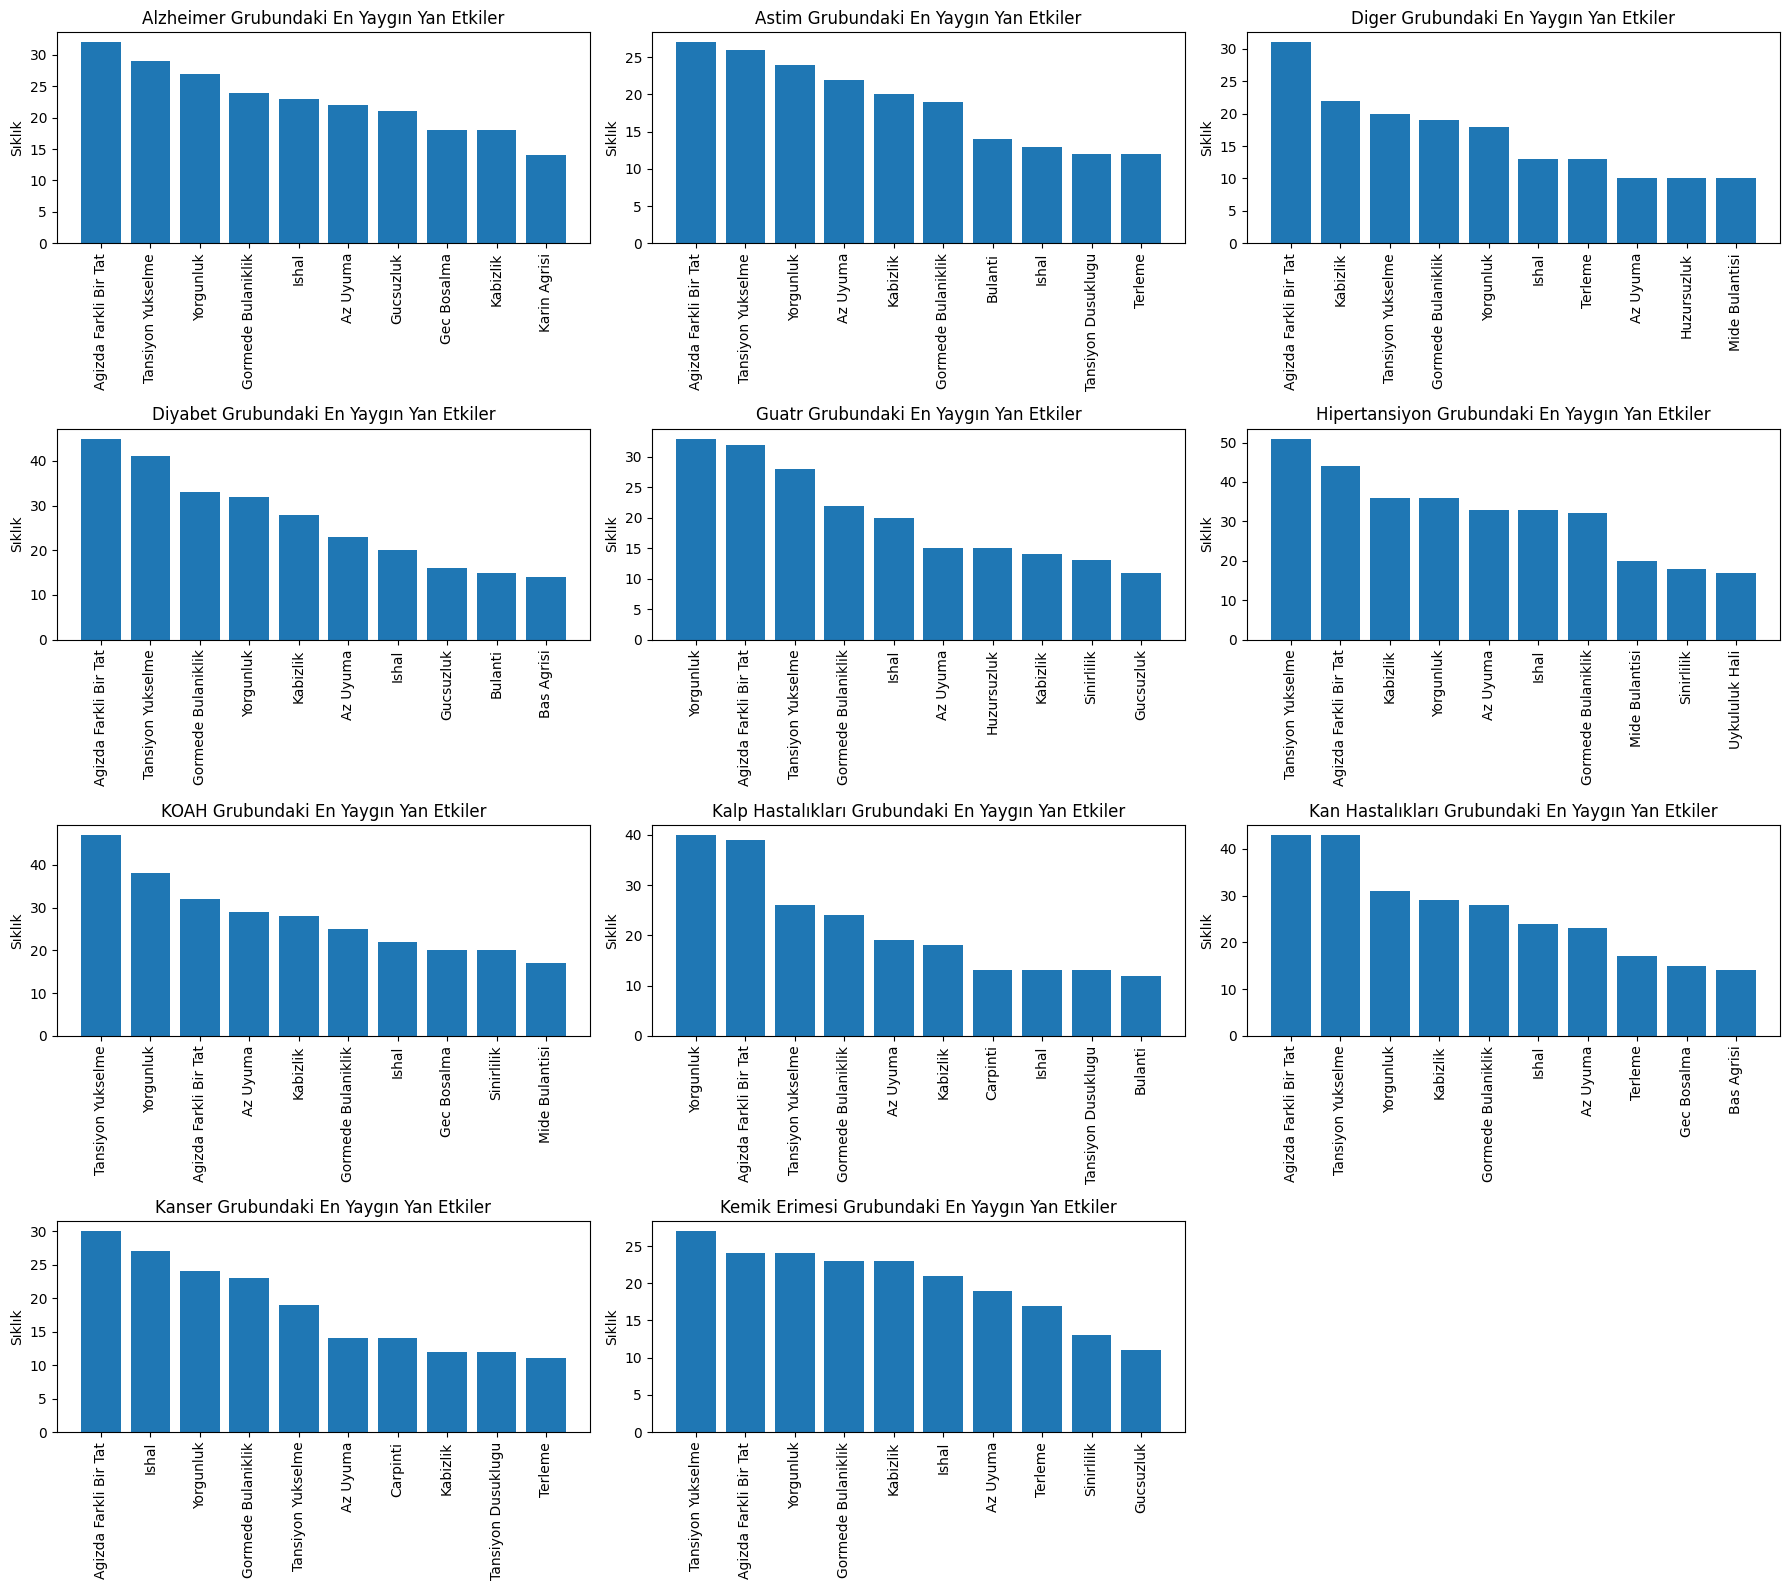

In [7]:
Alzheimer=DepGroup.get_group("Alzheimer")
Astim=DepGroup.get_group("Astim")
Diger=DepGroup.get_group("Diger")
Diyabet=DepGroup.get_group("Diyabet")
Guatr=DepGroup.get_group("Guatr")
Hipertansiyon=DepGroup.get_group("Hipertansiyon")
KOAH=DepGroup.get_group("KOAH")
Kalp_Hastaliklari=DepGroup.get_group("Kalp Hastaliklari")
Kan_Hastaliklari=DepGroup.get_group("Kan Hastaliklari")
Kanser=DepGroup.get_group("Kanser")
Kemik_Erimesi=DepGroup.get_group("Kemik Erimesi")

groups = [Alzheimer, Astim, Diger, Diyabet, Guatr, Hipertansiyon, KOAH, Kalp_Hastaliklari, Kan_Hastaliklari, Kanser, Kemik_Erimesi]
group_names = ['Alzheimer', 'Astim', 'Diger', 'Diyabet', 'Guatr', 'Hipertansiyon', 'KOAH', 'Kalp Hastalıkları', 'Kan Hastalıkları', 'Kanser', 'Kemik Erimesi']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()

for i, (group, name) in enumerate(zip(groups, group_names)):

    ilac_yan_etki_count = group.groupby(['Ilac_Adi', 'Yan_Etki']).size().reset_index(name='Sıklık')


    top_yan_etkiler = ilac_yan_etki_count.groupby('Yan_Etki')['Sıklık'].sum().nlargest(10)


    axes[i].bar(top_yan_etkiler.index, top_yan_etkiler.values)
    axes[i].set_title(f'{name} Grubundaki En Yaygın Yan Etkiler')
    axes[i].set_ylabel('Sıklık')
    axes[i].tick_params(axis='x', rotation=90)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


Her bir hastalık grubundaki en yaygın 5 İlacı çubuk grafiği ile gözleme;

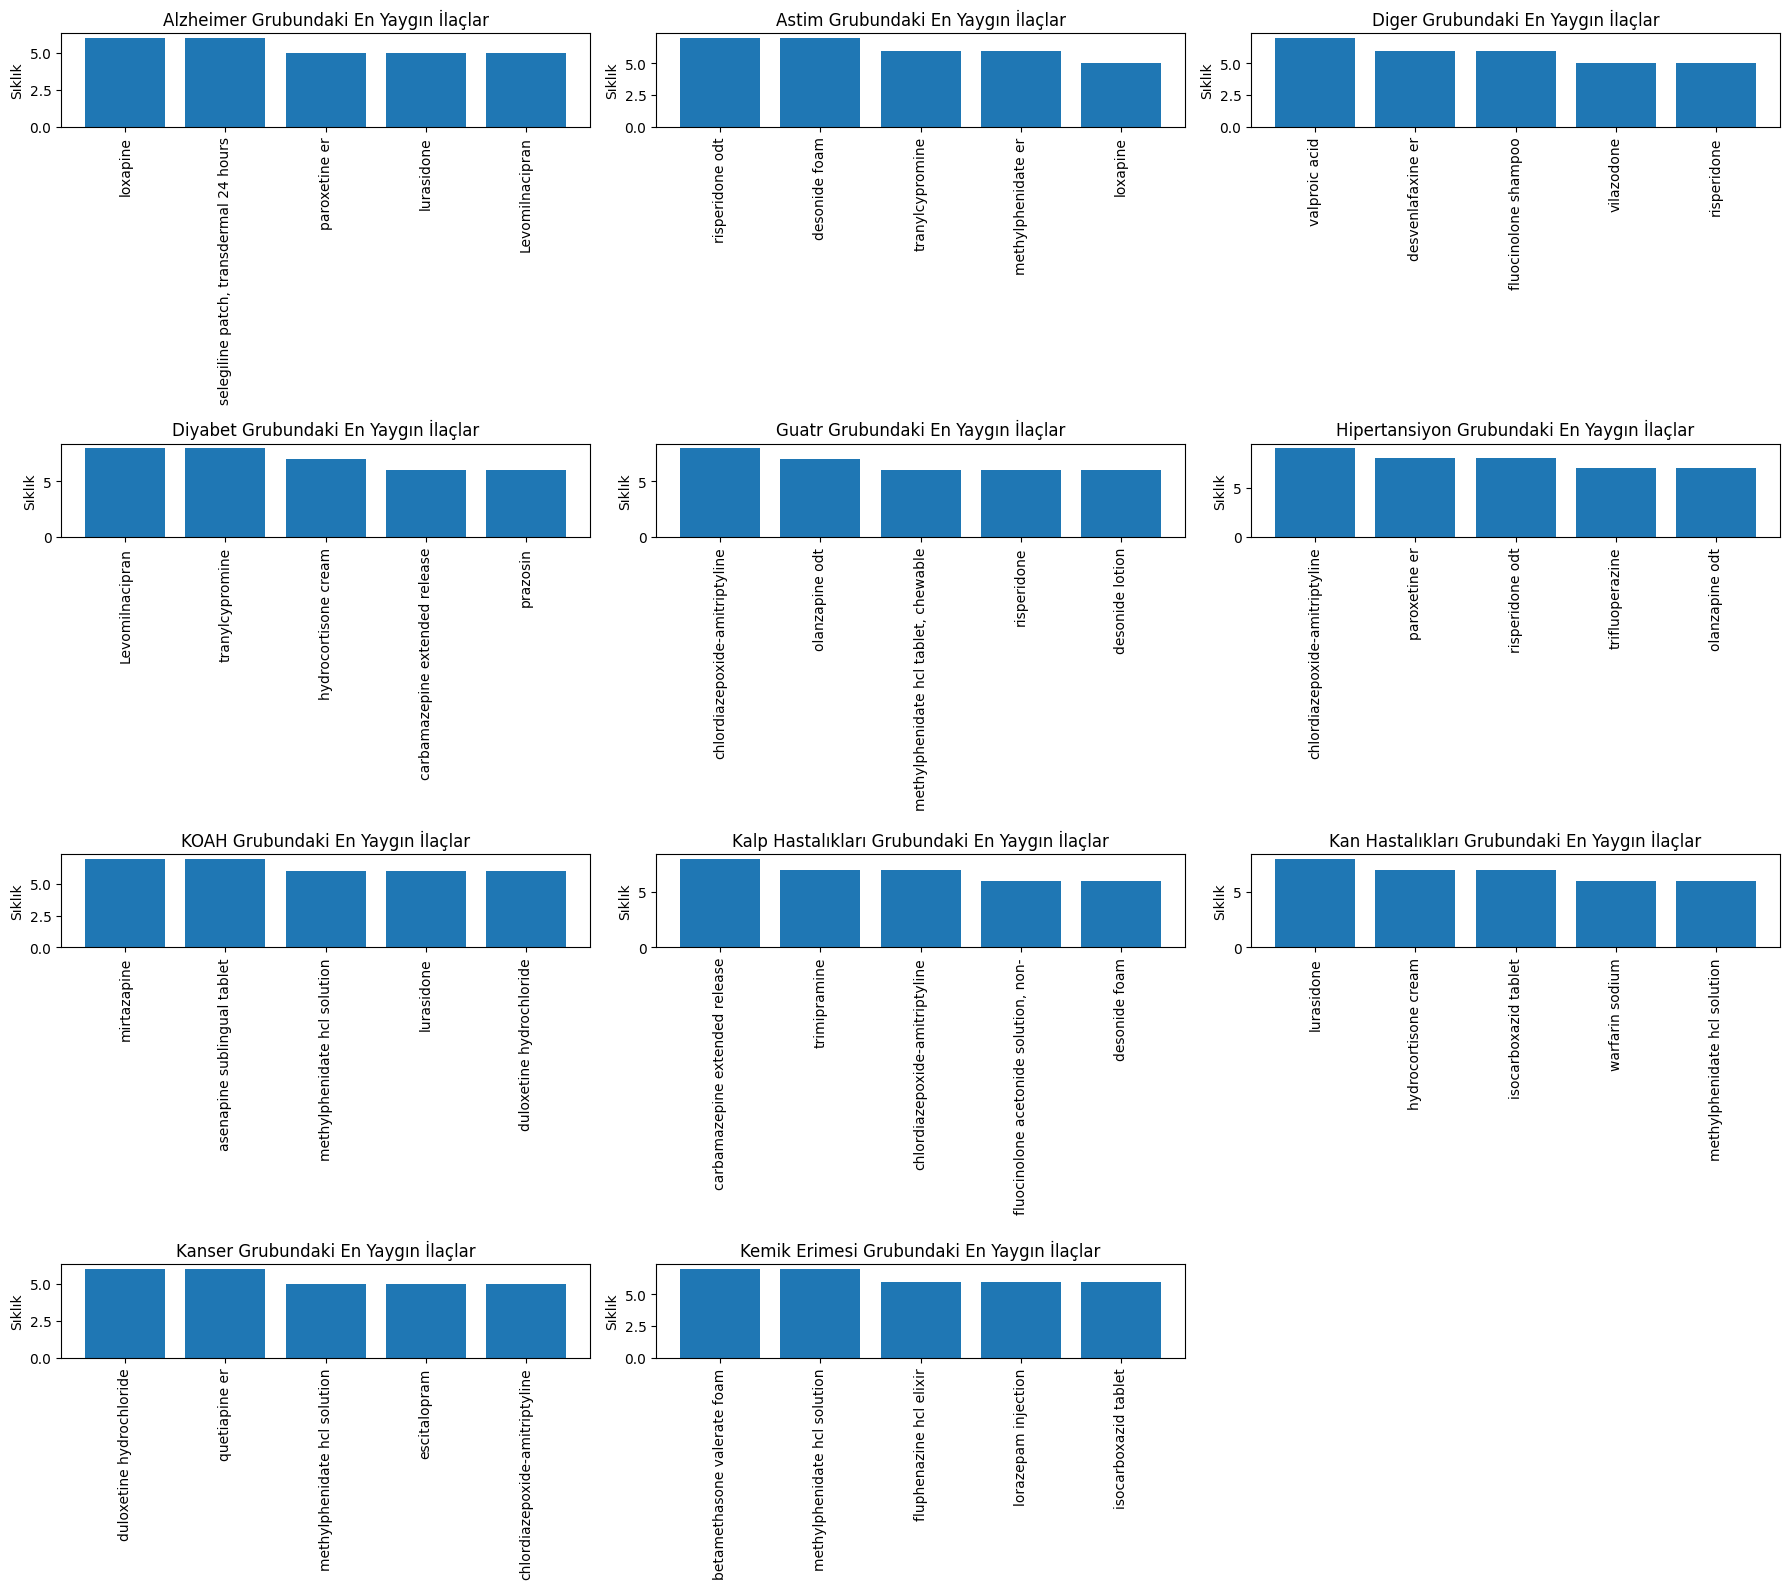

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18,16))
axes = axes.flatten()

for i, (group, name) in enumerate(zip(groups, group_names)):

    ilac_count = group['Ilac_Adi'].value_counts().nlargest(5)

    axes[i].bar(ilac_count.index, ilac_count.values)
    axes[i].set_title(f'{name} Grubundaki En Yaygın İlaçlar')
    axes[i].set_ylabel('Sıklık')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=3)
plt.tight_layout()
plt.show()


**Her bir hastalık grubundaki en yaygın 10 ilacın en yaygın 3 yan etkisini gözlemleme;**

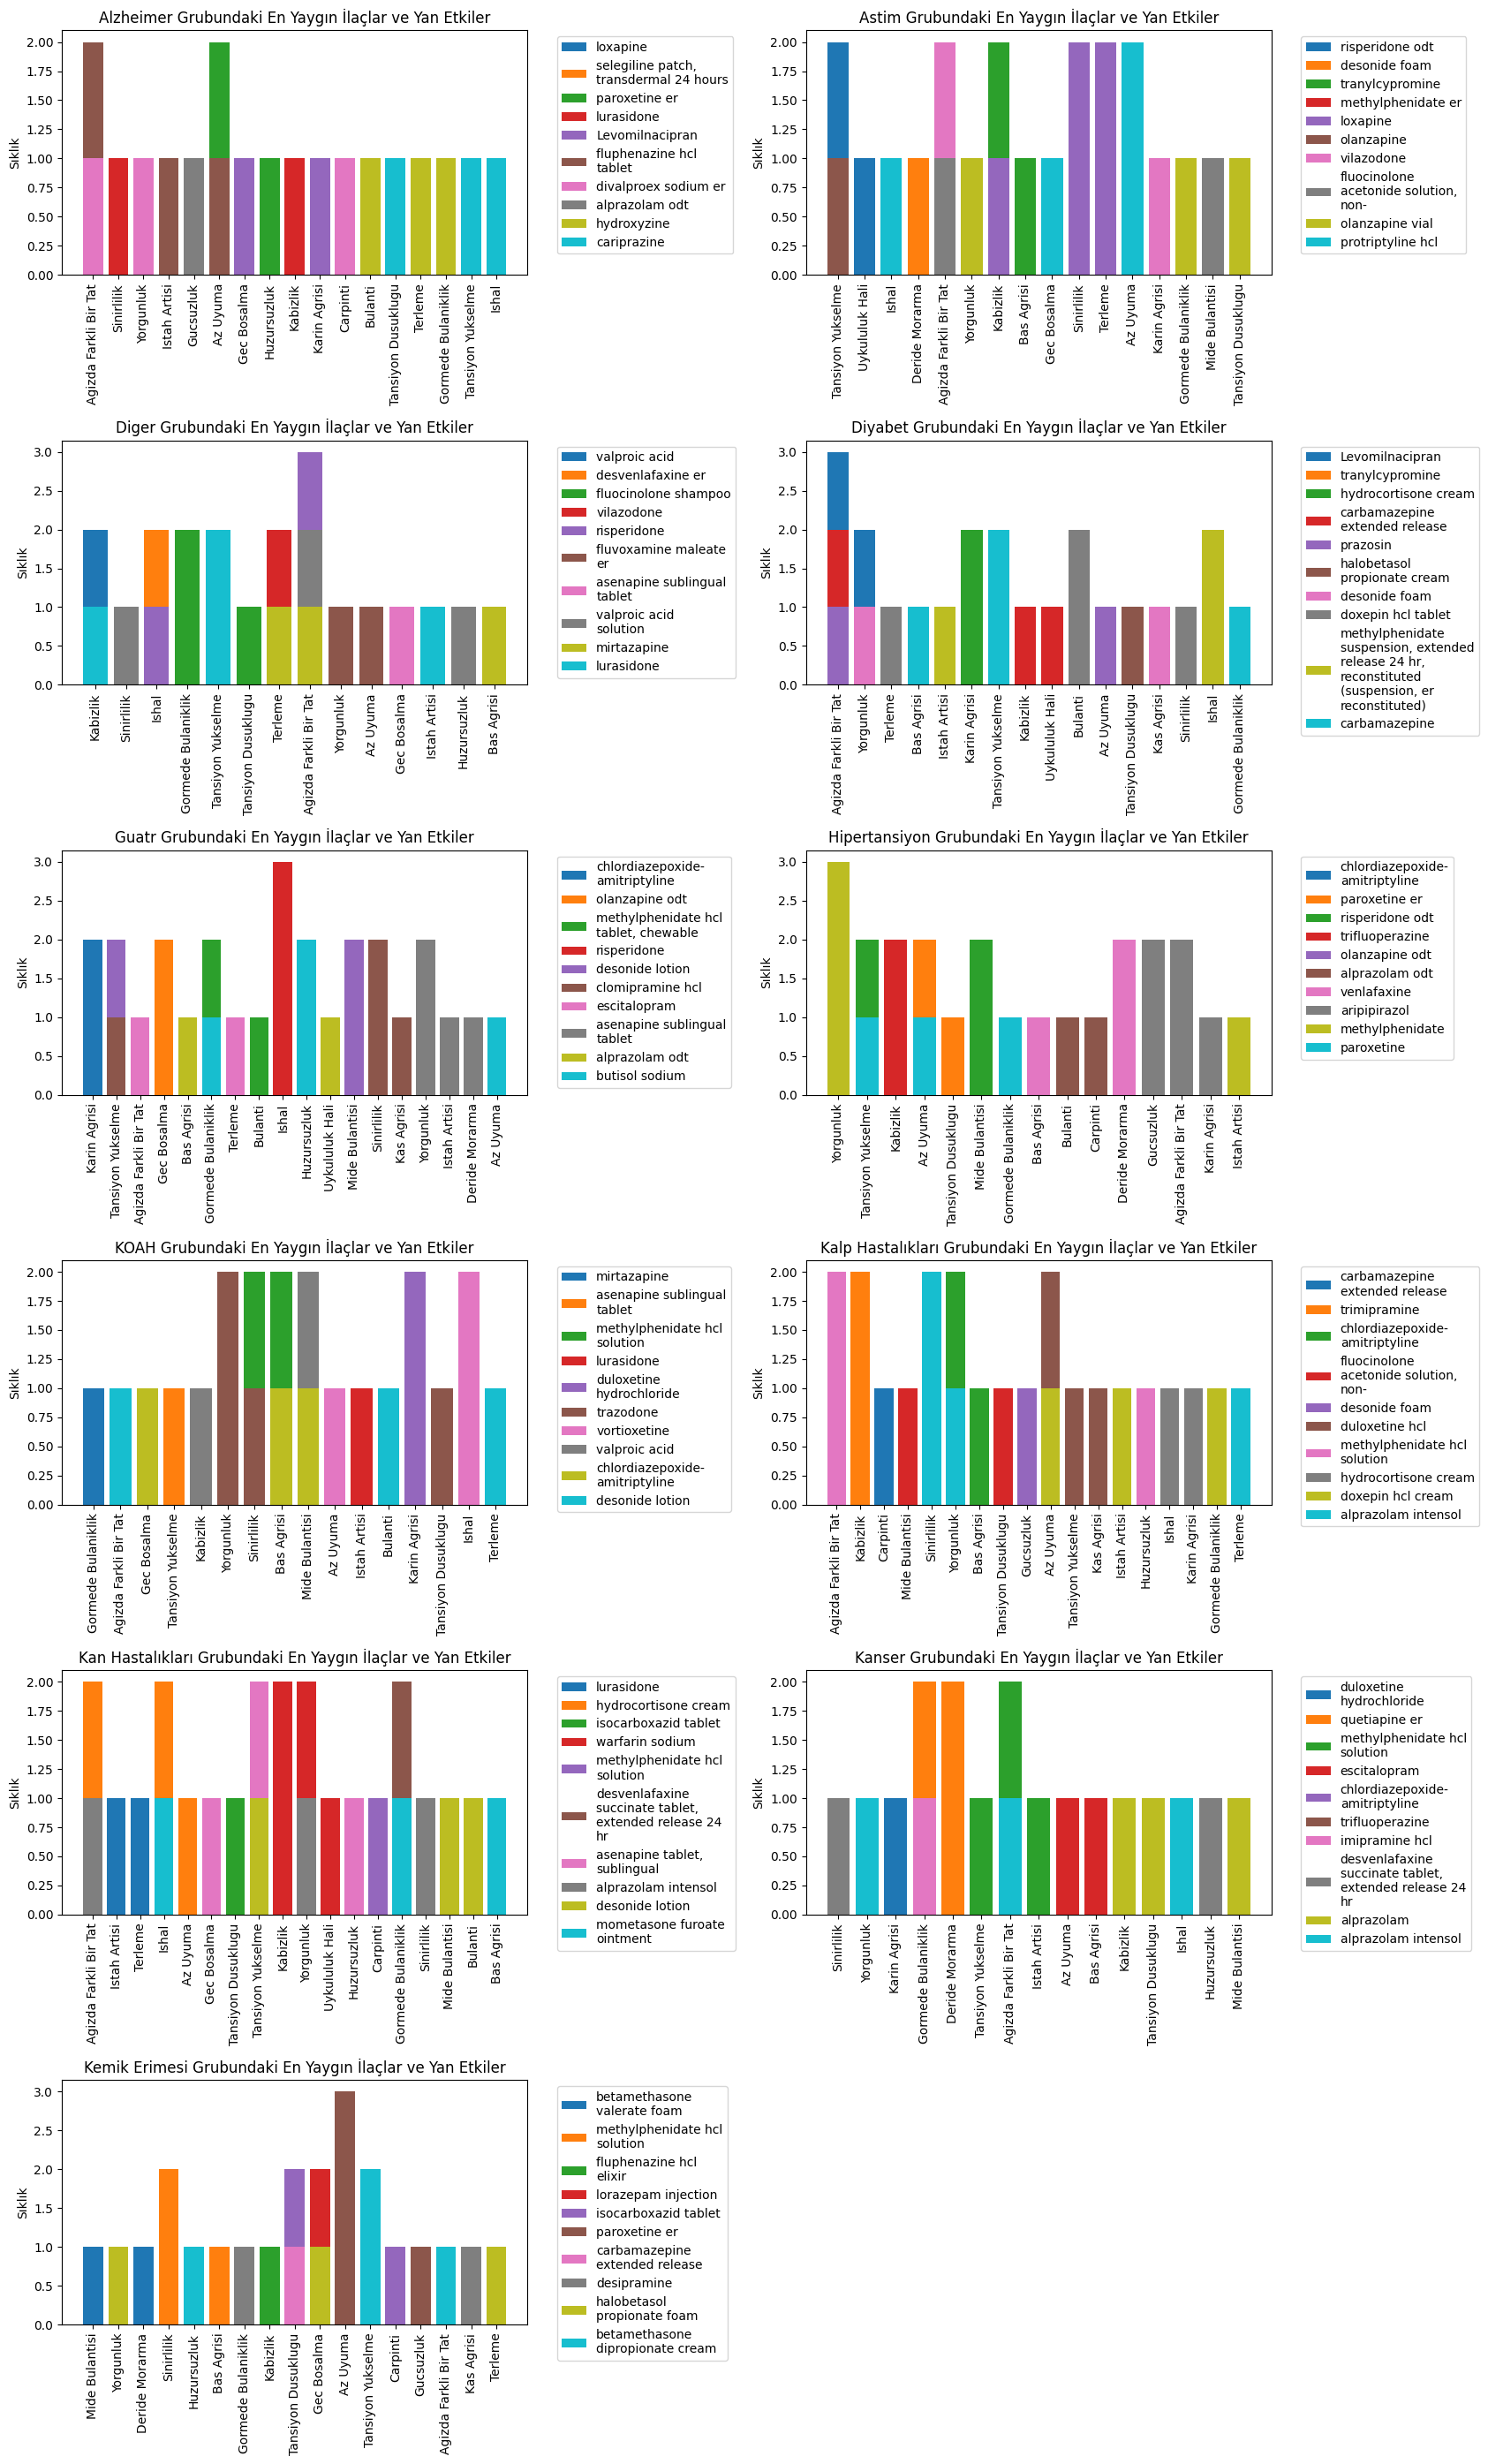

In [19]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 28))
axes = axes.flatten()

for i, (group, name) in enumerate(zip(groups, group_names)):

    ilac_count = group['Ilac_Adi'].value_counts().nlargest(10)

    for ilac in ilac_count.index:
        ilac_yan_etki_count = group[group['Ilac_Adi'] == ilac]['Yan_Etki'].value_counts().nlargest(3)
        yan_etki_labels = ilac_yan_etki_count.index

        wrapped_label = "\n".join(textwrap.wrap(ilac, width=20))

        axes[i].bar(yan_etki_labels, ilac_yan_etki_count.values, label=wrapped_label)

    axes[i].set_title(f'{name} Grubundaki En Yaygın İlaçlar ve Yan Etkiler')
    axes[i].set_ylabel('Sıklık')
    axes[i].tick_params(axis='x', rotation=90)

    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# Verisetini Makine Öğrenimi model eğitimine hazır hale getirme;

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [48]:
# Kronik Hastaliklarim sütununda olduğu gibi verilerde boşluk olması durumuna karşı bütün sütunları temizleme;
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Eksik veriler -> sayısal sütunlar için ortalama, kategorik sütunlar için en sık görülen değer
df['Kilo'].fillna(df['Kilo'].mean(), inplace=True)
df['Boy'].fillna(df['Boy'].mean(), inplace=True)
df['Cinsiyet'].fillna(df['Cinsiyet'].mode()[0], inplace=True)
df['Il'].fillna(df['Il'].mode()[0], inplace=True)
df['Yan_Etki'].fillna('Bilinmiyor', inplace=True)  # Yan etki NaN ise 'Bilinmiyor' olarak doldurma

# İlgisiz sütunları kaldırma
df.drop(['Kullanici_id', 'Dogum_Tarihi', 'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi'], axis=1, inplace=True)

<ipython-input-48-351b5ca3fbac>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [49]:
# Cinsiyet ve Uyruk gibi kategorik verileri dönüştürme;
le = LabelEncoder()

df['Cinsiyet'] = le.fit_transform(df['Cinsiyet'])
df['Uyruk'] = le.fit_transform(df['Uyruk'])
df['Il'] = le.fit_transform(df['Il'])
df['Ilac_Adi'] = le.fit_transform(df['Ilac_Adi'])
df['Yan_Etki'] = le.fit_transform(df['Yan_Etki'])
df['Alerjilerim'] = le.fit_transform(df['Alerjilerim'].astype(str))
df['Kronik Hastaliklarim'] = le.fit_transform(df['Kronik Hastaliklarim'].astype(str))
df['Baba Kronik Hastaliklari'] = le.fit_transform(df['Baba Kronik Hastaliklari'].astype(str))
df['Anne Kronik Hastaliklari'] = le.fit_transform(df['Anne Kronik Hastaliklari'].astype(str))
df['Kiz Kardes Kronik Hastaliklari'] = le.fit_transform(df['Kiz Kardes Kronik Hastaliklari'].astype(str))
df['Erkek Kardes Kronik Hastaliklari'] = le.fit_transform(df['Erkek Kardes Kronik Hastaliklari'].astype(str))
df['Kan Grubu'] = le.fit_transform(df['Kan Grubu'].astype(str))

In [50]:
scaler = StandardScaler()
# Kilo ve Boy sütunlarını ölçeklendirme
df[['Kilo', 'Boy']] = scaler.fit_transform(df[['Kilo', 'Boy']])

In [51]:
# Hedef değişken Yan_Etki olarak düşünürsek;
X = df.drop('Yan_Etki', axis=1)
y = df['Yan_Etki']

# Eğitim ve test verilerini ayırma;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
